# Assignment

In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

- Evaluate the performance of your model with the metrics you have learned in this course.
- Plot the ROC and the precision / recall curves for different "c" values.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

In [45]:
from yellowbrick.classifier import ROCAUC

In [3]:
titanic = pd.read_csv('train.csv')

### Model

In [4]:
titanic[['2nd_class','3rd_class']] = pd.get_dummies(titanic.Pclass,drop_first=True)
titanic['is_male'] = pd.get_dummies(titanic.Sex, drop_first=True)
titanic['is_male'] = pd.get_dummies(titanic.Sex, drop_first=True)

Y = titanic.Survived

X = titanic[['2nd_class','3rd_class', 'is_male', 'Fare', 'SibSp', 'Parch' ]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [23]:
train_prediction = log_reg.predict(X_train)
test_prediction = log_reg.predict(X_test)

### Metrics

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix_train = confusion_matrix(y_train, train_prediction)
confusion_matrix_test = confusion_matrix(y_test, test_prediction)

In [10]:
print("Confusion Matrix (Train Data)", "-"*30, confusion_matrix_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, confusion_matrix_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[379  55]
 [ 91 187]]


Confusion Matrix (Test Data)
------------------------------
[[97 18]
 [19 45]]


In [29]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print(classification_report(y_test, test_prediction))
print( "-"*60)
print("f1_score() value        : {:.2f}".format(f1_score(y_test, test_prediction)))
print("recall_score() value    : {:.2f}".format(recall_score(y_test, test_prediction)))
print("precision_score() value : {:.2f}".format(precision_score(y_test, test_prediction)))
print('\n')
print( "-"*60)
metrics = precision_recall_fscore_support(y_test, test_prediction)
print("Precision  :" , metrics[0]) 
print("Recall     :" , metrics[1]) 
print("F1 Score   :" , metrics[2]) 



              precision    recall  f1-score   support

           0       0.84      0.84      0.84       115
           1       0.71      0.70      0.71        64

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

------------------------------------------------------------
f1_score() value        : 0.71
recall_score() value    : 0.70
precision_score() value : 0.71


------------------------------------------------------------
Precision  : [0.8362069  0.71428571]
Recall     : [0.84347826 0.703125  ]
F1 Score   : [0.83982684 0.70866142]


### ROC Curve

In [12]:
test_prediction_proba = log_reg.predict_proba(X_test)[:,1]

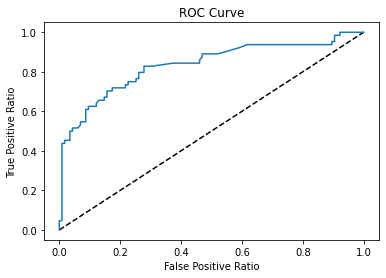

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, test_prediction_proba)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.xlabel('False Positive Ratio')
plt.ylabel('True Positive Ratio')
plt.title('ROC Curve')

plt.show()

### Precision/Recall Curve

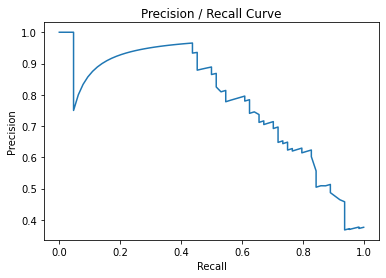

In [15]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, test_prediction_proba)

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall Curve')

plt.show()

### Plotting with different C values

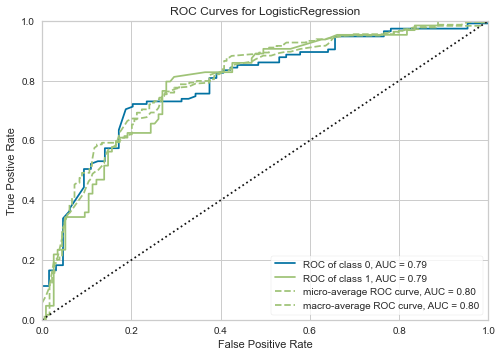

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [46]:
from yellowbrick.classifier import ROCAUC

model1 = LogisticRegression(C = 0.001, multi_class="auto", solver="liblinear")
visualizer1 = ROCAUC(model1)

visualizer1.fit(X_train, y_train)        
visualizer1.score(X_test, y_test)        
visualizer1.show()         

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


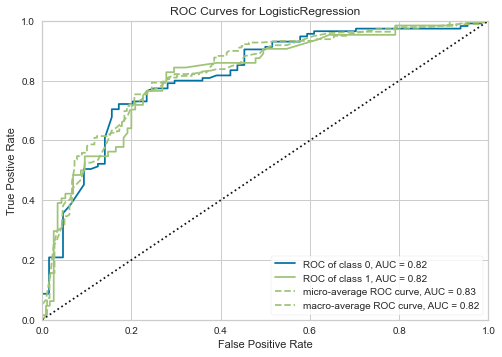

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [39]:
model2 = LogisticRegression(C = 0.01, multi_class="auto", solver="liblinear")
visualizer2 = ROCAUC(model2)

visualizer2.fit(X_train, y_train)        
visualizer2.score(X_test, y_test)        
visualizer2.show() 

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


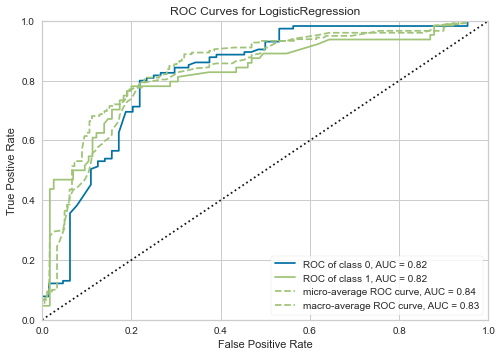

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [40]:
model3 = LogisticRegression(C = 0.1, multi_class="auto", solver="liblinear")
visualizer3 = ROCAUC(model3)

visualizer3.fit(X_train, y_train)        
visualizer3.score(X_test, y_test)        
visualizer3.show() 

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


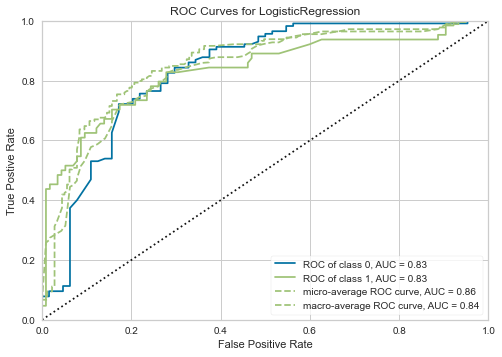

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [41]:
model4 = LogisticRegression(C = 1, multi_class="auto", solver="liblinear")
visualizer4 = ROCAUC(model4)

visualizer4.fit(X_train, y_train)        
visualizer4.score(X_test, y_test)        
visualizer4.show() 

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


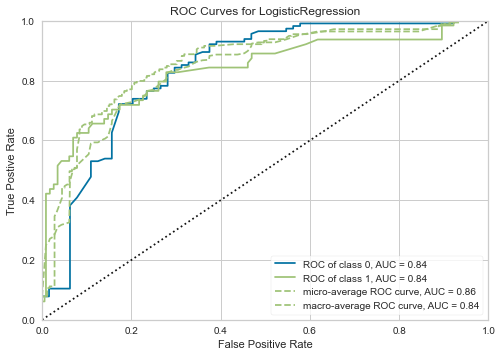

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [42]:
model5 = LogisticRegression(C = 10, multi_class="auto", solver="liblinear")
visualizer5 = ROCAUC(model5)

visualizer5.fit(X_train, y_train)        
visualizer5.score(X_test, y_test)        
visualizer5.show() 

/usr/local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


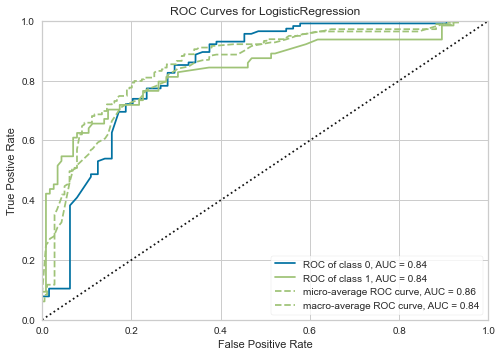

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [43]:
model6 = LogisticRegression(C = 100, multi_class="auto", solver="liblinear")
visualizer6 = ROCAUC(model6)

visualizer6.fit(X_train, y_train)        
visualizer6.score(X_test, y_test)        
visualizer6.show() 